In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [188]:
df = pd.read_csv('Wine.csv')

X = df.drop(columns=['Customer_Segment'])
Y = df['Customer_Segment']

In [189]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [190]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [192]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_scaled

array([[-0.74202682, -1.06773956, -0.69720543, ...,  1.08569599,
         0.38891198, -0.99369548],
       [ 0.95122876, -0.73994339,  1.22380472, ...,  0.96179926,
         0.16481661,  1.84566562],
       [-0.24401047,  0.04853929, -0.27031429, ..., -1.59873315,
        -1.34782707, -0.82957056],
       ...,
       [-1.10308867, -0.22610075, -2.33362149, ...,  1.29219054,
         0.51496562, -0.04177095],
       [-1.20269194, -1.25378603, -1.26639363, ...,  1.74647854,
         0.73906098, -1.45981025],
       [ 0.66486936,  0.69527227,  0.93921062, ..., -1.51613533,
        -1.81002376, -0.73109561]])

In [193]:
pca = PCA(n_components=2)

features_pca = pca.fit_transform(X_train_scaled)
features_pca_test = pca.transform(X_test)

features_pca

array([[-2.33324612,  1.56653921],
       [-2.44375896, -1.77549659],
       [ 3.63788125, -0.27002113],
       [-2.14344944, -1.57390214],
       [-2.50444053,  1.06313029],
       [ 0.53731136,  3.29701337],
       [ 2.84287199, -1.18884494],
       [-1.26570157,  1.16432129],
       [ 2.98719563, -1.55313408],
       [-2.67822588, -0.84823809],
       [-3.0360704 , -1.5534576 ],
       [ 3.48659337, -1.78118285],
       [ 0.04054832,  2.09646317],
       [ 3.66925667, -1.3752891 ],
       [ 3.05026369, -0.3306889 ],
       [-0.21382412,  1.21010874],
       [ 0.66202921,  0.24058226],
       [ 2.89904587, -1.70533896],
       [-1.04476612, -1.36769649],
       [ 1.64636295,  1.08350181],
       [ 2.62663031, -1.56120556],
       [-2.11295272, -1.24324453],
       [ 0.16081722,  2.12487276],
       [ 2.86000263, -2.27244598],
       [-2.56316771, -1.10908612],
       [-1.36173377,  2.34162131],
       [-2.12536824,  0.94815213],
       [ 3.83115528, -0.33951981],
       [ 0.22625392,

Метод `explained_variance_ratio_` показує на скліьки кожен вектор пояснює дисперсію даних.

In [194]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.35549348 0.19748472]


In [195]:
print("Total Explained Variance (Загальна пояснена різниця):", np.sum(explained_variance_ratio))

Total Explained Variance (Загальна пояснена різниця): 0.5529781951011978


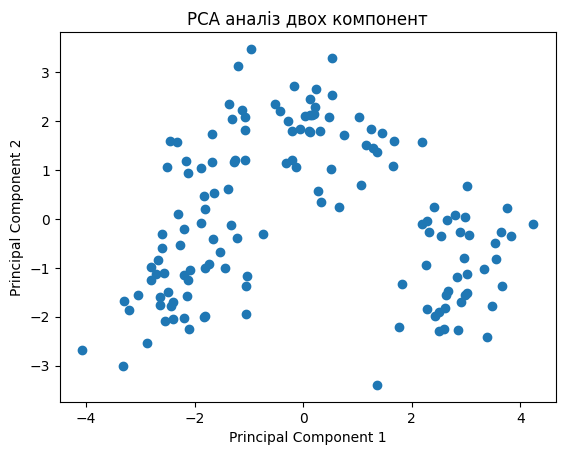

In [196]:
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title('PCA аналіз двох компонент')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [199]:
clf = DecisionTreeClassifier(random_state=2, max_depth=4)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.86

Confusion Matrix:
[[16  1  0]
 [ 0  9  1]
 [ 0  3  6]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.69      0.90      0.78        10
           3       0.86      0.67      0.75         9

    accuracy                           0.86        36
   macro avg       0.85      0.84      0.83        36
weighted avg       0.88      0.86      0.86        36



In [200]:
clf = RandomForestClassifier(random_state=2, max_depth=4)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.97

Confusion Matrix:
[[16  1  0]
 [ 0 10  0]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

